# Initiation à la bibliothèque Manim (version community)

## Installation

Vous avez lancé : 
```bash
conda install -c conda-forge manim
```

dans un environnement conda dédié à l'utilisation de manim.

Attention, il faut aussi installer Latex suivant la [documentation d'installation de manim](https://docs.manim.community/en/stable/installation/conda.html#optional-dependencies).


[Documentation officielle de manim](https://docs.manim.community/en/stable/tutorials_guides.html)

## Utiliser manim

On commence par importer tout le contenu de la bibliothèque manim.

```python
from manim import *
```

Ensuite on créé une classe qui hérite de la classe Scene de manim. Il existe plusieurs classes de base dans manim, comme ThreeDScene et VectorScene. On en verra par la suite.

```python
class CreateSquare(Scene):
    # Dans la méthode construct, on va définir les objets à afficher et les animations à réaliser.
    def construct(self):

        # Dans cette méthode, on va créer un carré et appliquer des transformations.
        square = Square()  # create a circle
        square.set_fill(RED, opacity=0.5)  # set the color and transparency
        square.set_stroke(color=BLUE, width=4)  # set the color and width of the border
        square.rotate(PI / 4)  # rotate the square by 45 degrees

        # On utilise self.play pour afficher les objets et les animations.
        self.play(Create(square))  # show the square
````

Pour lancer la création de l'animation et avoir le fichier vidéo, on lance la commande suivante :

````bash
manim -pql scene.py CreateSquare
````

Ou scene.py est le nom du fichier contenant la classe CreateSquare.

On peut également utiliser un fichier Jupyter pour créer les animations. Pour cela, on utilise la commande suivante :

````bash
%%manim -qm -v WARNING CreateSquare
````

Que l'on place EN HAUT d'une cellule de code Jupyter.

Résultat : 

<video controls src="assets/CreateSquare.mp4" height="400">



Les paramètres de sortie de la vidéo sont les suivants :

- `-p` : pour lire l'animation une fois que la vidéo est finie
- `-f` : pour afficher le fichier généré dans le gestionnaire de fichier

##

- `-ql` : pour une qualité basse (854x480 à 15 FPS)
- `-qm` : pour une qualité moyenne (1280x720 à 30 FPS)
- `-qh` : pour une qualité haute (1920x1080 à 60 FPS)
- `-qp` : pour une qualité 2K (2560x1440 à 60 FPS)
- `-qk` : pour une qualité 4K (3840x2160 à 60 FPS)

Pour avoir un fichier .gif : `--format gif`

In [11]:
from manim import *

In [13]:
liste_manim=(
	Scene,
	Square,
	Circle,
	Triangle,
	Create,
	Transform,
	MathTex,
	Axes,
	VGroup,
	Dot,
	Vector,
	ThreeDAxes,
	NumberPlane,
	PI,
)

print()

In [14]:
print(f"Manim version : {__import__('manim').__version__}")

Manim version : 0.19.0


---

# Afficher des objets

Avec manim on peut manipuler des objetcs pré existants dans la bibliothèque. Notamment ceux de la class geometry.polygram : https://docs.manim.community/en/stable/reference/manim.mobject.geometry.polygram.html.
On y retrouve par exemple les classes Square, Rectangle, Triangle, RegularPolygon, Star, etc.

Ces objets sont des éléments d'une classe supérieure, Mobject, qui permet de manipuler des objets géométriques.

On retrouve aussi des Ellipse, des points, des lignes, des vecteurs, des courbes, des surfaces, des textes, etc.

In [ ]:
%%manim -qm -v WARNING DisplayObjects

class DisplayObjects(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        triangle = Triangle()

        self.play(Create(circle))
        self.wait(1)
        self.add(square)
        self.wait(1)
        self.add(triangle)
        
        self.wait(1)

Manim Community v0.19.0

### Afficher du Texte

- Normal : Pour afficher du texte simple, on utilise la classe Text.
- Latex : Pour afficher des équations ou du texte en LaTex on va utiliser MathTex. (attention à bien installer Latex pour que cela fonctionne)

Documentation pour l'affichage de texte : https://docs.manim.community/en/stable/guides/using_text.html

In [22]:
%conda install -c conda-forge manim jupyter

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.


warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE

LibMambaUnsatisfiableError: Encountered problems while solving:
  - nothing provides numpy-base 1.23.3 py310h04254f7_1 needed by numpy-1.23.3-py310h60c9a35_1

Could not solve for environment specs
The following packages are incompatible
├─ manim is installable with the potential options
│  ├─ manim [0.15.2|0.16.0.post0] would require
│  │  └─ mapbox_earcut >=0.12.10,<0.13.0  with the potential options
│  │     ├─ mapbox_earcut 0.12.10 would require
│  │     │  └─ python >=3.6,<3.7.0a0 , which can be installed;
│  │     ├─ mapbox_earcut 0.12.10 would require
│  │     │  └─ python >=3.7,<3.8.0a0 , which can be installed;
│  │     ├─ mapbox_earcut 0.12.10 would require
│  │     │  └─ python >=3.8,<3.9.0a0 , which can be installed;
│  │     └─ mapbox_earcut 0.12.10 would require
│  │        └─ python >=3.9,<3.10.0a0 , which can be installed;
│  ├─ manim [0.17.0|0.17.1|0.17.2|0.17.3] would require
│  │  └─ numpy >

In [23]:
from manim import *
%load_ext manim.utils.ipython_magic


The manim.utils.ipython_magic module is not an IPython extension.


In [24]:
%%manim -qm -v WARNING DisplayLatex

class DisplayLatex(Scene):
    def construct(self):
        tex = MathTex(r"\int_{-\infty}^\infty e^{-x^2} dx = \sqrt{\pi}", font_size=96)
        self.play(Create(tex))
        self.wait(1)

Manim Community v0.19.0

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

On peut également combiner le texte et les objets géométriques.

In [25]:
%%manim -qm -v WARNING DisplayLatexAndObjects

class DisplayLatexAndObjects(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        triangle = Triangle()
        tex = MathTex(r"\int_{-\infty}^\infty e^{-x^2} dx = \sqrt{\pi}").to_edge(UP)

        self.play(Create(circle))
        self.wait(1)
        self.add(square)
        self.wait(1)
        self.add(triangle)
        self.wait(1)
        self.add(tex)
        self.wait(1)

Manim Community v0.19.0

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

---

# Utiliser des transformations

Ici on va transformer un carré en cercle. Pour ça on va utiliser la fonction `Transform`.
La fonction `Transform` prend en argument l'objet à transformer (de type `Mobject`) et l'objet de destination (de type `Mobject`) et est à utiliser dans la méthode `self.play`.

Dans Manim, les objets de base qui sont utilisés pour créer des animations sont des objets de la classe `Mobject` (pour "Mathematical Object"). Les objets de cette classe sont des objets graphiques qui peuvent être manipulés et transformés.


In [26]:
%%manim -qm -v WARNING SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

Manim Community v0.19.0

La fonction `Transform` de Manim permet également de transformer un objet (`mobject`) en un autre (`target_mobject`) en suivant un **chemin défini** par une fonction (`path_func`). 

Voici quelques exemples pour illustrer les différents paramètres :

### Transformation avec un chemin linéaire

Par défaut le chemin entre deux objets est linéaire. 

In [27]:
%%manim -qm -v WARNING SimpleTransform

class SimpleTransform(Scene):
    def construct(self):
        square_1 = Square()
        # La fonction move_to permet de déplacer l'objet à une position donnée, ici (-2, 0)
        square_2 = Square().move_to(LEFT*2)

        self.play(Transform(square_1, square_2))

Manim Community v0.19.0

### Transformation avec un chemin circulaire



In [28]:
%%manim -qm -v WARNING CircularTransform

class CircularTransform(Scene):
    def construct(self):
        square_1 = Square()
        # La commande move_to permet de déplacer l'objet à une position donnée, ici (2, 0)
        square_2 = Square().move_to(RIGHT*2)

        self.play(Transform(square_1, square_2, path_arc=PI))

Manim Community v0.19.0



Ici, `square` est transformé en un autre `square` plus à droite, en suivant un arc de cercle de 180 degrés (PI radians).

### Transformation avec une fonction de chemin personnalisée



In [29]:
%%manim -qm -v WARNING CustomPathTransform

class CustomPathTransform(Scene):
    def construct(self):
        square_1 = Square()
        square_2 = Square()

        def custom_path_func(start_points, end_points, alpha):
            return start_points + alpha * (end_points - start_points) + np.sin(alpha * PI) * RIGHT

        self.play(Transform(square_1, square_2, path_func=custom_path_func))

Manim Community v0.19.0



Dans cet exemple, `square` est transformé en un autre `square` en suivant un chemin défini par `custom_path_func`, qui ajoute un mouvement sinusoïdal vers la droite (`RIGHT`).

### Explication des paramètres de Transform()

- `mobject` : L'objet à transformer. Dans les exemples, c'est `square_1`.
- `target_mobject` : L'objet cible de la transformation. Dans les exemples, c'est `square_2`.
- `path_func` : Une fonction définissant le chemin que les points de `mobject` suivent pour atteindre `target_mobject`. Si non défini, un chemin linéaire est utilisé par défaut.
- `path_arc` : L'angle de l'arc (en radians) que les points de `mobject` suivront pour atteindre `target_mobject` si un chemin circulaire est utilisé.
- `path_arc_axis` : L'axe de rotation si un chemin circulaire est utilisé.
- `path_arc_centers` : Le centre des arcs circulaires le long desquels les points de `mobject` sont déplacés par la transformation.
- `replace_mobject_with_target_in_scene` : Si `True`, `mobject` sera retiré de la scène et `target_mobject` le remplacera une fois la transformation terminée.

Le paramètre `replace_mobject_with_target_in_scene` est important dans le cas où l'on veut que l'objet de départ soit remplacé par l'objet d'arrivée. Si ce paramètre est `False`, les deux objets seront affichés à la fin de la transformation.

Pour illustrer tout ça, on va appliquer 2 transformations successives pour voir comment les objets se comportent.

In [ ]:
%%manim -qm -v WARNING FadeInFadeOut

class FadeInFadeOut(Scene):
    def construct(self):
        square_1 = Square()
        square_2 = Square().move_to(UP*2)
        square_3 = Square().move_to(DOWN*2+RIGHT*2)
        
        self.play(Transform(square_1, square_2))
        # On utilise wait() pour attendre 1 seconde
        self.wait()
        self.play(Transform(square_2, square_3))
        

Manim Community v0.18.1

On transforme square_1 en square_2, puis square_2 en square_3. Ce qu'on voit c'est que les carrés sont dupliqués, en effet lors de la première transformation, le carré d'arrivée n'est pas remplacé par le carré de départ, ce dernier devient un nouveau carré à la même position que square_2. Pour éviter cela, on peut utiliser le paramètre `replace_mobject_with_target_in_scene` et le mettre à `True`, ou bien on peut appliquer la deuxième transformation à `square_1` et non à `square_2`. 
Le mieux est de mettre `replace_mobject_with_target_in_scene` à `True` pour éviter les erreurs et les doublons.

In [ ]:
%%manim -qm -v WARNING FadeInFadeOutWithShift

class FadeInFadeOutWithShift(Scene):
    def construct(self):
        square_1 = Square()
        square_2 = Square().move_to(UP*2)
        square_3 = Square().move_to(DOWN*2+RIGHT*2)
        
        self.play(Transform(square_1, square_2, replace_mobject_with_target_in_scene=True))
        self.wait()
        self.play(Transform(square_2, square_3))

Manim Community v0.18.1

---

# Animer des objets

In [ ]:
%%manim -qm -v WARNING DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        # Un carré de gauche, bleu, d'opacité 0.7 et décalé de 2 vers la gauche
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2 * LEFT)
        # Un carré de droite, vert, d'opacité 0.7 et décalé de 2 vers la droite
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2 * RIGHT)
        self.play(
            left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2
        )
        self.wait()

Manim Community v0.18.1

Ici on compare le résultat entre l'utilisation de animate.rotate et Rotate

---

# Déplacer et gérer des objets

Ici on va afficher les axes et ajouter des points sur ces axes. 
On va les regrouper avec ce qu'on appelle un `VGroup` (pour "Vector Group"). C'est un objet qui permet de regrouper plusieurs objets graphiques (Mobjects) en un seul objet. Cela permet de manipuler et d'animer plusieurs objets en même temps ou bien d'itérer sur les objets du groupe.

On va ensuite itérer sur les points pour afficher leur coordonnées à coté d'eux, avec la méthode `next_to` des Mobjects.

In [30]:
%%manim -qm -v WARNING PointsAvecCoordonnees

class PointsAvecCoordonnees(Scene):
    def construct(self):
        # Créer les axes avec des nombres
        axes = Axes(
            x_range=[-5, 5, 1],  # Plage de l'axe x
            y_range=[-5, 5, 1],  # Plage de l'axe y
            x_length=10,  # Longueur de l'axe x
            y_length=6,   # Longueur de l'axe y
            axis_config={"include_numbers": False}  # Ne pas afficher les nombres sur les axes
        )

        # Liste des coordonnées des points
        coordonnees_points = [
            (1, 2),
            (2, 3),
            (3, 1),
            (-2, -2),
            (-2, -3),
            (-3, -1)
        ]

        # Créer un VGroup pour les points
        points = VGroup()
        for coord in coordonnees_points:
            # Convertir les coordonnées en positions sur les axes
            point = Dot(point=axes.coords_to_point(coord[0], coord[1]), color=RED)
            points.add(point)

        # Ajouter les axes et les points à la scène
        self.add(axes, points)

        # Ajouter les coordonnées à côté de chaque point
        for point, coord in zip(points, coordonnees_points):
            # Créer le texte des coordonnées
            texte_coord = MathTex(f"({coord[0]}, {coord[1]})", font_size=24)
            # Positionner le texte à côté du point
            texte_coord.next_to(point, RIGHT, buff=0.1)
            # Ajouter le texte à la scène
            self.add(texte_coord)

Manim Community v0.19.0

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

À présent on va représenter des vecteurs avec des flèches. Pour cela on va utiliser la classe `Vector` de Manim. On va créer un vecteur à partir de deux points (ici le deuxième point est l'origine). On peut également spécifier la couleur et la taille de la flèche.
Les vecteurs sont ajoutés à un VGroup pour pouvoir les manipuler ensemble. Et par itération, on va afficher les coordonnées des vecteurs à coté d'eux.

Manim Community v0.18.1

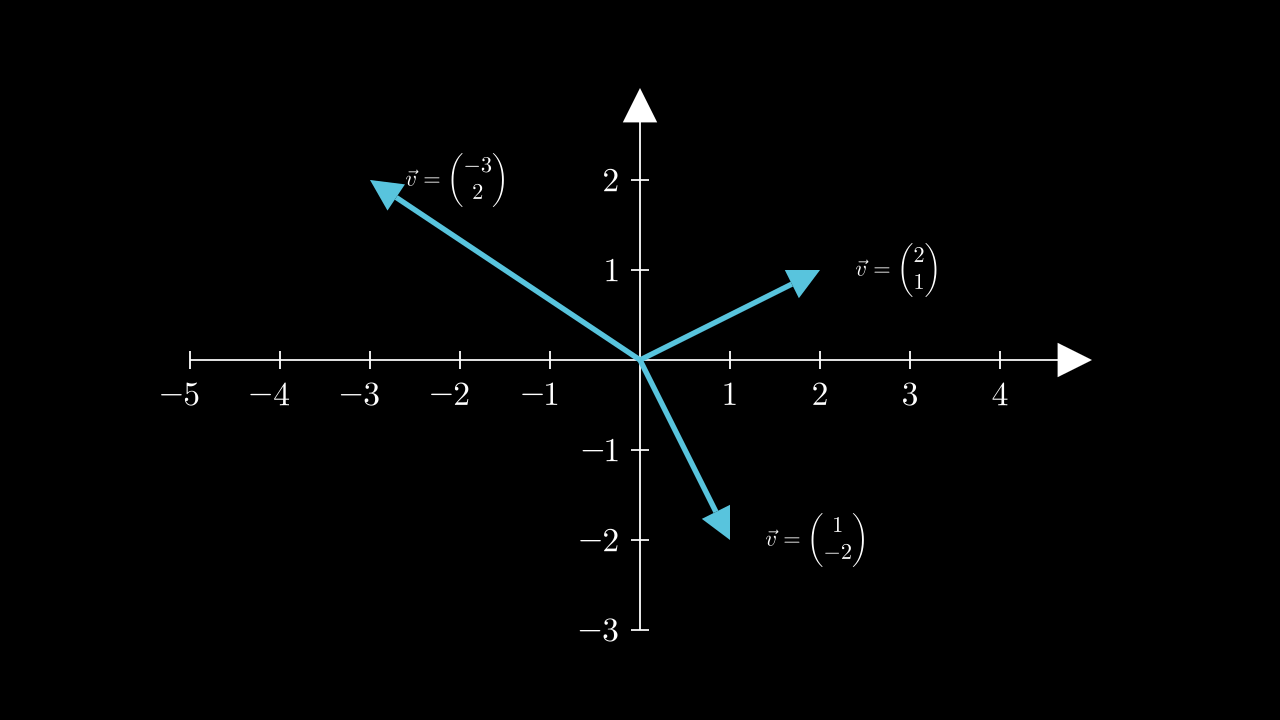

In [ ]:
%%manim -qm -v WARNING VecteursAvecCoordonnees

class VecteursAvecCoordonnees(Scene):
    def construct(self):
        # Créer les axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-3, 3, 1],
            x_length=10,
            y_length=6,
            axis_config={"include_numbers": True}
        )

        # Liste des vecteurs (composantes x et y)
        liste_vecteurs = [
            [2, 1],
            [-3, 2],
            [1, -2]
        ]

        # Créer un VGroup pour les vecteurs
        vecteurs = VGroup()
        for composantes in liste_vecteurs:
            # Créer le vecteur à partir des composantes
            vecteur = Vector(
                direction=axes.coords_to_point(composantes[0], composantes[1]),
                color=BLUE
            )
            # Ajouter le vecteur au VGroup
            vecteurs.add(vecteur)

        # Ajouter les axes et les vecteurs à la scène
        self.add(axes, vecteurs)

        # Ajouter les coordonnées à côté de chaque vecteur
        for vecteur, composantes in zip(vecteurs, liste_vecteurs):
            # Créer le texte des coordonnées du vecteur
            texte_coord = MathTex(
                f"\\vec{{v}} = \\begin{{pmatrix}} {composantes[0]} \\\\ {composantes[1]} \\end{{pmatrix}}",
                font_size=24
            )
            # Positionner le texte à l'extrémité du vecteur
            texte_coord.next_to(vecteur.get_end(), RIGHT, buff=0.4)
            # Ajouter le texte à la scène
            self.add(texte_coord)

---

# Tracer des fonctions en 2D

Pour tracer une fonction on peut décider d'afficher le quadrillage ou bien de tracer les axes.

Manim Community v0.18.1

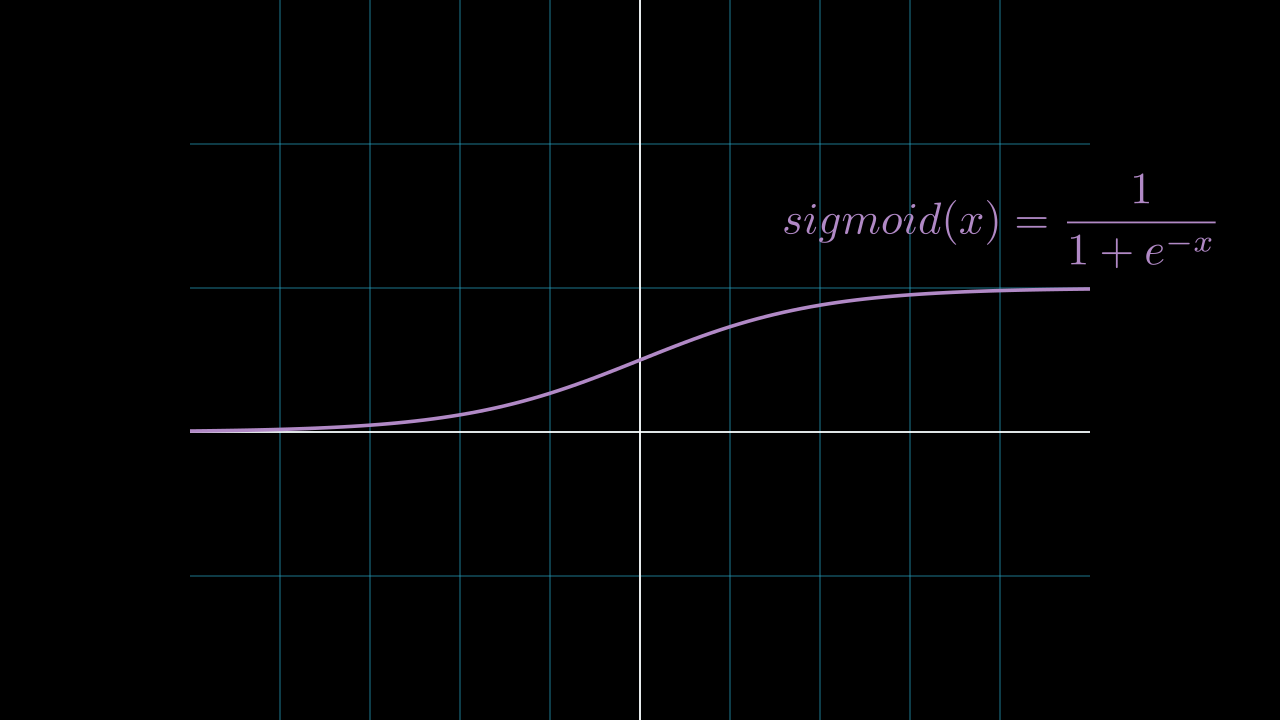

In [ ]:
%%manim -qm -v WARNING TracerFonctionSigmoidQuad

class TracerFonctionSigmoidQuad(Scene):
    def construct(self):
        # On crée le quadrillage
        ax = NumberPlane(y_range=[-2, 3], # On définit l'intervalle de valeurs pour y
                         x_range=[-5, 5], # On définit l'intervalle de valeurs pour x
                         y_length=8, # On définit la longueur de l'axe des ordonnées
                         background_line_style={"stroke_opacity": 0.4})

        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        curve_1 = ax.plot(lambda x: sigmoid(x), color=PURPLE_B)  # On trace la fonction sigmoid en violet

        label_1 = ax.get_graph_label(curve_1, r"sigmoid(x) = \frac{1}{1+e^{-x}}", x_val=4, direction=UP)  # On ajoute une légende en haut à droite

        # On ajoute le quadrillage, la courbe et la légende à la scène
        self.add(ax, curve_1, label_1)

In [ ]:
%%manim -qm -v WARNING TracerFonctionSigmoidAxes

class TracerFonctionSigmoidAxes(Scene):
    def construct(self):
        ax = Axes(
            x_range=[-5, 5, 1],  # On définit l'intervalle de valeurs pour x
            y_range=[-0.2, 1.2, 0.2],  # On définit l'intervalle de valeurs pour y
            x_length=10,  # On définit la longueur de l'axe des abscisses
            y_length=6,  # On définit la longueur de l'axe des ordonnées
            axis_config={"color": WHITE},  # On définit la couleur des axes
            tips=True  # On laisse les flèches aux extrémités des axes
        )
        
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        curve = ax.plot(lambda x : sigmoid(x), color=BLUE)
        label = ax.get_graph_label(curve, r"sigmoid(x) = \frac{1}{1+e^{-x}}", x_val=4, direction=UP)

        self.play(Create(ax), Create(curve), Create(label))

Manim Community v0.18.1

---

# Tracer des fonctions en 3D

On va voir maintenant comment le faire en 3D, avec TreeDScene. Et également comment mettre en place la caméra et comment ajouter le déplacement de la caméra.

Tout d'abord voici comment sont gérer les angles de la caméra:

<div>
<img src="assets/angle_manim.png" width="500"/>
</div>

### Affichage de la fonction carré en 3D

Manim Community v0.18.1

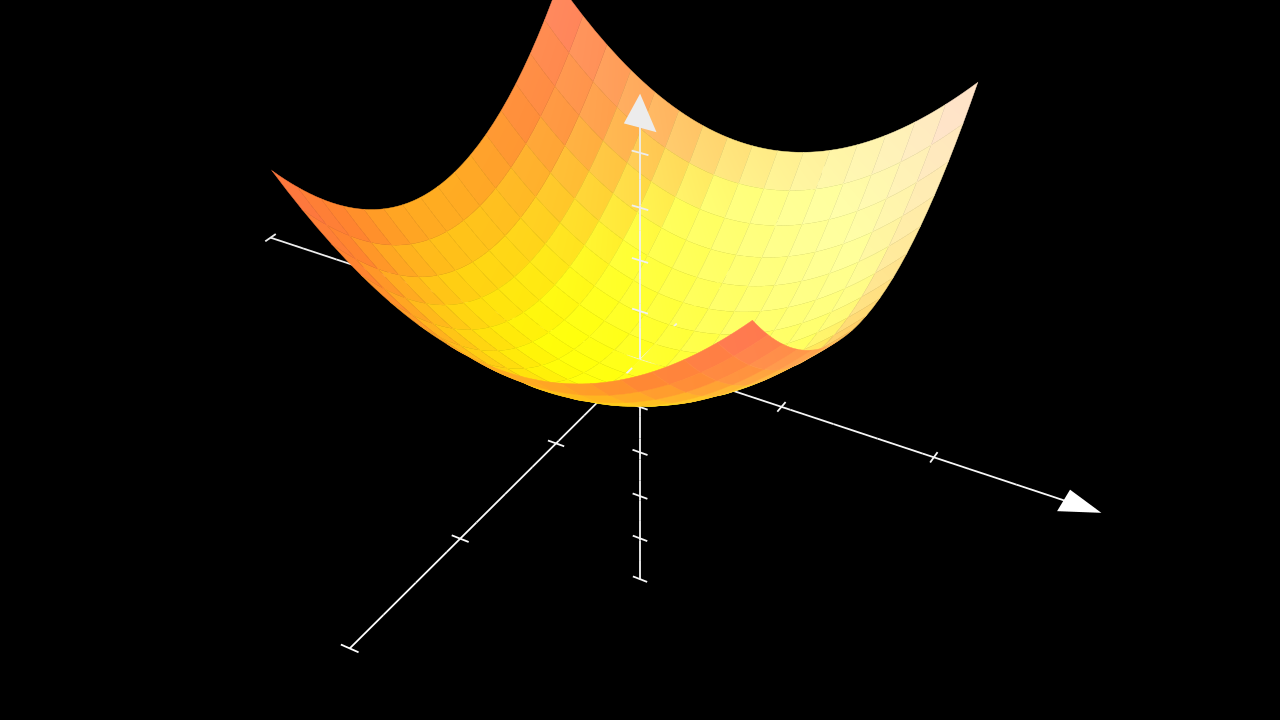

In [ ]:
%%manim -qm -v WARNING PlotSurface

class PlotSurface(ThreeDScene):
    def construct(self):
        resolution_fa = 16  # On définit la résolution de la surface
        self.set_camera_orientation(phi=55 * DEGREES, theta=-60 * DEGREES)  # On définit l'orientation de la caméra
        
        axes = ThreeDAxes(x_range=(-3, 3, 1), y_range=(-3, 3, 1), z_range=(-5, 5, 1))
        
        def param_trig(u, v):
            x = u
            y = v
            z = x**2 + y**2
            return z
        
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range = (-1.5, 1.5),
            v_range = (-1.5, 1.5),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
            )
        
        self.add(axes, trig_plane)

### Ajouter un déplacement de la caméra

In [ ]:
%%manim -qm -v WARNING PlotSurfaceMoving

class PlotSurfaceMoving(ThreeDScene):
    def construct(self):
        resolution_fa = 16  # On définit la résolution de la surface
        self.set_camera_orientation(phi=55 * DEGREES, theta=-60 * DEGREES)  # On définit l'orientation de la caméra
        
        axes = ThreeDAxes(x_range=(-3, 3, 1), y_range=(-3, 3, 1), z_range=(-5, 5, 1))
        
        def param_trig(u, v):
            x = u
            y = v
            z = x**2 + y**2
            return z
        
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range = (-1.5, 1.5),
            v_range = (-1.5, 1.5),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
            )
        
        self.add(axes, trig_plane)
        
        # On fait se déplacer la caméra autour de la surface
        self.begin_ambient_camera_rotation(rate=0.2)
        self.wait(4)
        self.stop_ambient_camera_rotation()

Manim Community v0.18.1